### Import necessary packages

In [ ]:
import numpy as np
import pandas as pd


PDP is a model-agnostic, global explanation technique.
It's main flaw is the independence assumption. In cases when this assumption does not hold, then the averages calculated for PDP will have unlikely or even impossible datapoints. 

- More than two features becomes uninterpretable and difficult to plot.
- Not accurate for values in intervals with little data. Always check distributions!
- Marginal effects averaging to zero if a feature has both positive and negative association with target. This is misleading.  Prevent this by using ICE curve (Individual Conditional Expectation)

### German Credit Dataset 

In [23]:
data = pd.read_csv('../SHAP/data/german_credit_data.csv', index_col=0)

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


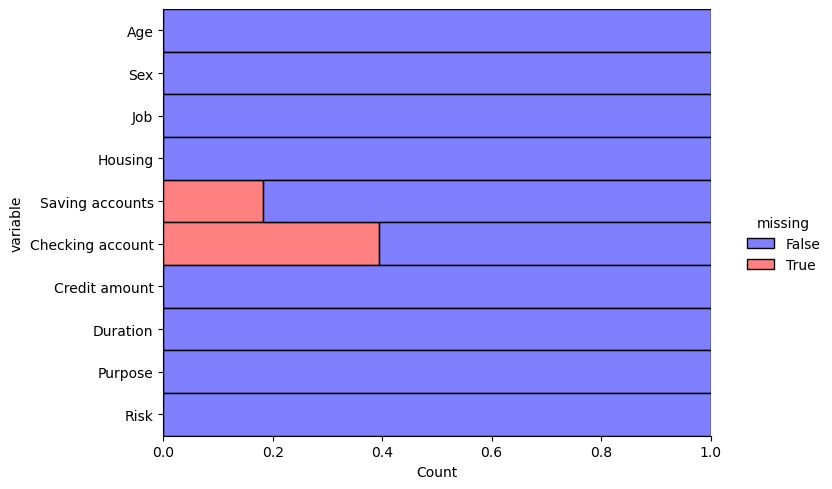

In [24]:
from matplotlib import pyplot as plt 

# Visualise missing data
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5,
    palette="seismic"
)

plt.show()

In [25]:
data.fillna('unknown', inplace = True)

In [26]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # use label encoder to turn string-like feature into integer format

columns = list(data.columns) # get all columns

for column in columns:
    if type(data[column].iloc[0]) == str: # check that the column value is of type 'str'
        le.fit(data[column]) # transform to 'int'
        data[column] = le.transform(data[column]) # and replace

In [28]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier